# Solución de ecuaciones de una variable

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/1.0_Solucion_ecuaciones_de_una_variable.ipynb)

In [86]:
import numpy as np

from importlib import reload
import lib.metodos_solucion_ecuaciones
reload(lib.metodos_solucion_ecuaciones)
from lib.metodos_solucion_ecuaciones import graficar, met_biseccion, met_regula_falsi, met_newton_raphson

## Ejercicio
Utilizando el método grfáfico, encontrar la solución a la ecuación $e^x - 3 \sin(x) -3x$

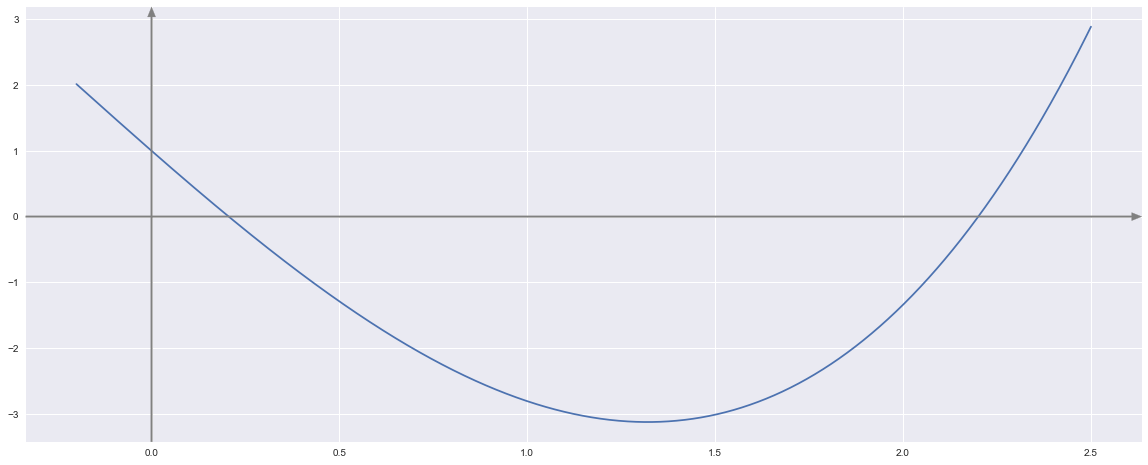

In [87]:
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
graficar(f, -0.2, 2.5)

## Ejercicio
Utilizando el método grfáfico, encontrar la solución a la ecuación $e^{-2x} = -\frac{1}{x}$

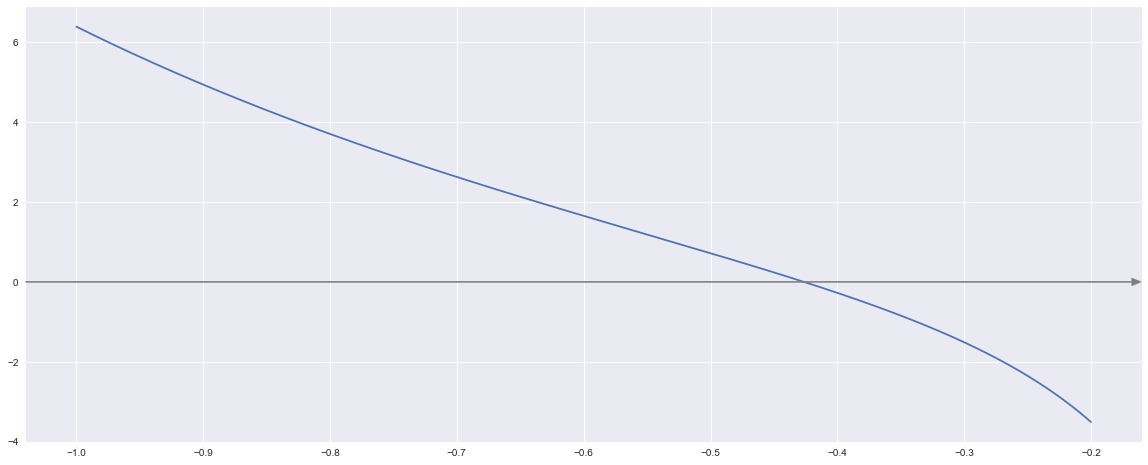

In [88]:
f = lambda x: np.e**(-2*x) + 1/x
graficar(f, -1, -0.2)

## Ejercicio
Utilizando el método grfáfico, encontrar la solución a la ecuación $x^{20} - 1 = 0$

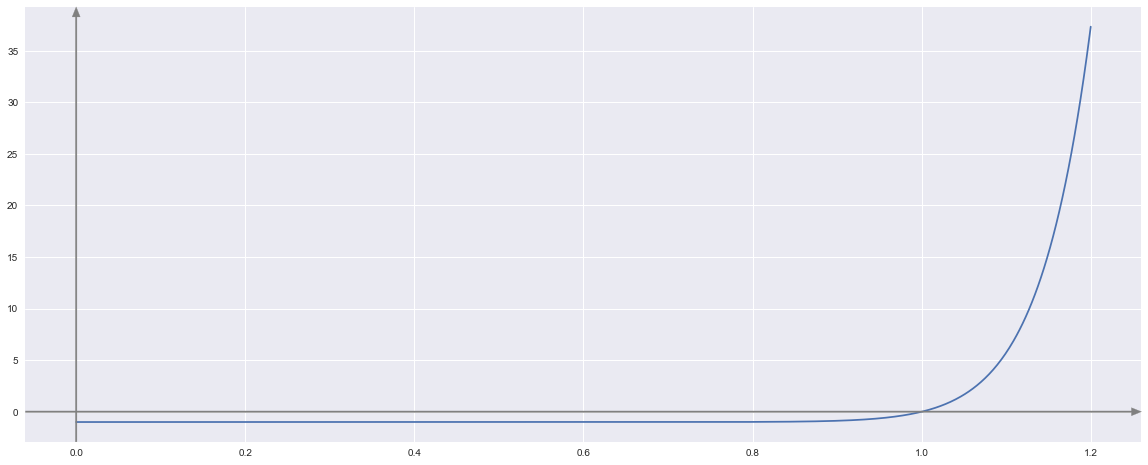

In [89]:
f = lambda x: x**20 - 1
graficar(f, 0, 1.2)

## Ejercicio
Utilizando el método grfáfico, encontrar la solución a la ecuación $\sin(3x) - \cos(3x) = 1, \ \  -2.5\leq x \leq 0$

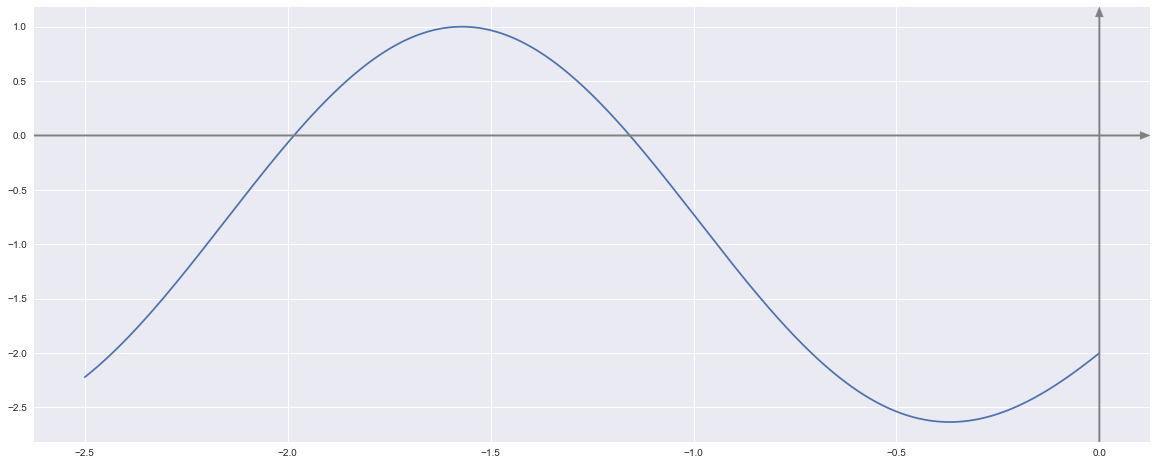

In [90]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
graficar(f, -2.5, 0)

In [91]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
met_biseccion(f, -1.5, -0.5, 1e-4, n=50, print_error=True)

ite 1 : a_0  = -1.5000, b_0  = -0.5000, p_1  = -1.00000
ite 2 : a_1  = -1.5000, b_1  = -1.0000, p_2  = -1.25000
ite 3 : a_2  = -1.2500, b_2  = -1.0000, p_3  = -1.12500
ite 4 : a_3  = -1.2500, b_3  = -1.1250, p_4  = -1.18750
ite 5 : a_4  = -1.1875, b_4  = -1.1250, p_5  = -1.15625
ite 6 : a_5  = -1.1875, b_5  = -1.1562, p_6  = -1.17188
ite 7 : a_6  = -1.1719, b_6  = -1.1562, p_7  = -1.16406
ite 8 : a_7  = -1.1641, b_7  = -1.1562, p_8  = -1.16016
ite 9 : a_8  = -1.1602, b_8  = -1.1562, p_9  = -1.15820
ite 10: a_9  = -1.1582, b_9  = -1.1562, p_10 = -1.15723
ite 11: a_10 = -1.1572, b_10 = -1.1562, p_11 = -1.15674
ite 12: a_11 = -1.1572, b_11 = -1.1567, p_12 = -1.15698
ite 13: a_12 = -1.1570, b_12 = -1.1567, p_13 = -1.15686
ite 14: a_13 = -1.1570, b_13 = -1.1569, p_14 = -1.15692
errores x iteración: [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05]
>>> Solución encontrada despu

-1.15692138671875

In [92]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
met_regula_falsi(f, -1.5, -0.5, 1e-4, n=50, print_error=True)

ite 1 : a_0  = -1.5000, b_0  = -0.5000, p_1  = -1.22398
ite 2 : a_1  = -1.2240, b_1  = -0.5000, p_2  = -1.15325
ite 3 : a_2  = -1.2240, b_2  = -1.1533, p_3  = -1.15716
ite 4 : a_3  = -1.1572, b_3  = -1.1533, p_4  = -1.15697
ite 5 : a_4  = -1.1570, b_4  = -1.1533, p_5  = -1.15697
ite 6 : a_5  = -1.1570, b_5  = -1.1533, p_6  = -1.15697
ite 7 : a_6  = -1.1570, b_6  = -1.1533, p_7  = -1.15697
ite 8 : a_7  = -1.1570, b_7  = -1.1533, p_8  = -1.15697
errores x iteración: [1.0, 0.7239845035524939, 0.07073079490912626, 0.003905268131076056, 0.003716001147412884, 0.0037155471171810284, 0.0037155460285354103, 0.003715546025925276, 6.439293542825908e-15]
>>> Solución encontrada después de 8 iteraciones: x->-1.156969254669286


-1.1569692546692865

In [93]:
f = lambda x: x**20 - 1
met_biseccion(f, 0, 1.2, tol=1e-8, n=500, print_error=True)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.60000
ite 2 : a_1  = 0.6000, b_1  = 1.2000, p_2  = 0.90000
ite 3 : a_2  = 0.9000, b_2  = 1.2000, p_3  = 1.05000
ite 4 : a_3  = 0.9000, b_3  = 1.0500, p_4  = 0.97500
ite 5 : a_4  = 0.9750, b_4  = 1.0500, p_5  = 1.01250
ite 6 : a_5  = 0.9750, b_5  = 1.0125, p_6  = 0.99375
ite 7 : a_6  = 0.9937, b_6  = 1.0125, p_7  = 1.00312
ite 8 : a_7  = 0.9937, b_7  = 1.0031, p_8  = 0.99844
ite 9 : a_8  = 0.9984, b_8  = 1.0031, p_9  = 1.00078
ite 10: a_9  = 0.9984, b_9  = 1.0008, p_10 = 0.99961
ite 11: a_10 = 0.9996, b_10 = 1.0008, p_11 = 1.00020
ite 12: a_11 = 0.9996, b_11 = 1.0002, p_12 = 0.99990
ite 13: a_12 = 0.9999, b_12 = 1.0002, p_13 = 1.00005
ite 14: a_13 = 0.9999, b_13 = 1.0000, p_14 = 0.99998
ite 15: a_14 = 1.0000, b_14 = 1.0000, p_15 = 1.00001
ite 16: a_15 = 1.0000, b_15 = 1.0000, p_16 = 0.99999
ite 17: a_16 = 1.0000, b_16 = 1.0000, p_17 = 1.00000
ite 18: a_17 = 1.0000, b_17 = 1.0000, p_18 = 1.00000
ite 19: a_18 = 1.0000, b_18 = 1.0000, p_19 = 1

1.000000002980232

In [94]:
f = lambda x: x**20 - 1
met_regula_falsi(f, 0, 1.2, tol=1e-8, n=500, print_error=True)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.03130
ite 2 : a_1  = 0.0313, b_1  = 1.2000, p_2  = 0.06179
ite 3 : a_2  = 0.0618, b_2  = 1.2000, p_3  = 0.09147
ite 4 : a_3  = 0.0915, b_3  = 1.2000, p_4  = 0.12039
ite 5 : a_4  = 0.1204, b_4  = 1.2000, p_5  = 0.14855
ite 6 : a_5  = 0.1485, b_5  = 1.2000, p_6  = 0.17598
ite 7 : a_6  = 0.1760, b_6  = 1.2000, p_7  = 0.20269
ite 8 : a_7  = 0.2027, b_7  = 1.2000, p_8  = 0.22870
ite 9 : a_8  = 0.2287, b_8  = 1.2000, p_9  = 0.25404
ite 10: a_9  = 0.2540, b_9  = 1.2000, p_10 = 0.27871
ite 11: a_10 = 0.2787, b_10 = 1.2000, p_11 = 0.30274
ite 12: a_11 = 0.3027, b_11 = 1.2000, p_12 = 0.32615
ite 13: a_12 = 0.3261, b_12 = 1.2000, p_13 = 0.34894
ite 14: a_13 = 0.3489, b_13 = 1.2000, p_14 = 0.37114
ite 15: a_14 = 0.3711, b_14 = 1.2000, p_15 = 0.39276
ite 16: a_15 = 0.3928, b_15 = 1.2000, p_16 = 0.41381
ite 17: a_16 = 0.4138, b_16 = 1.2000, p_17 = 0.43432
ite 18: a_17 = 0.4343, b_17 = 1.2000, p_18 = 0.45429
ite 19: a_18 = 0.4543, b_18 = 1.2000, p_19 = 0

In [96]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
df= lambda x: 3*np.cos(3*x) + 2*np.sin(2*x)
met_newton_raphson(f, df, -1, 1e-10, print_error=True)

ite 1 : p_0  = -1.0000, p_1  = -1.15140
ite 2 : p_1  = -1.1514, p_2  = -1.15695
ite 3 : p_2  = -1.1569, p_3  = -1.15697
ite 4 : p_3  = -1.1570, p_4  = -1.15697
ite 5 : p_4  = -1.1570, p_5  = -1.15697
errores x iteración: [0.15139651643855045, 0.005553071079264393, 1.966689953825096e-05, 2.51933363060175e-10, 0.0]
solución encontrada


-1.1569692546692865